In [1]:
#importando dependências necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from astroquery.vizier import Vizier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import seaborn as sns

# Estatísticas da tabela inteira

In [2]:
catalog = Vizier(catalog="J/ApJ/913/32/sample")
catalog.ROW_LIMIT = 6000

result = catalog.query_constraints()

data = result[0].to_pandas()

correlation_matrix = data.corr()


print("Matriz de Correlação:")
print(correlation_matrix)

Matriz de Correlação:
              Gaia   RA_ICRS   DE_ICRS      rest      GMag       G-J  \
Gaia      1.000000  0.396236 -0.789103  0.124635 -0.153470  0.063451   
RA_ICRS   0.396236  1.000000  0.036800  0.056887  0.513491 -0.275313   
DE_ICRS  -0.789103  0.036800  1.000000 -0.099562  0.533736 -0.287645   
rest      0.124635  0.056887 -0.099562  1.000000 -0.403596  0.264178   
GMag     -0.153470  0.513491  0.533736 -0.403596  1.000000 -0.315058   
G-J       0.063451 -0.275313 -0.287645  0.264178 -0.315058  1.000000   
Ks-W1     0.059470 -0.130729 -0.171893  0.034350 -0.137563  0.112932   
W1Mag    -0.128270  0.475419  0.480754 -0.459436  0.782782 -0.788596   
RSG       0.013610 -0.024976 -0.046856       NaN -0.041818  0.115743   
CL        0.078848 -0.111039 -0.171246  0.312342  0.062871  0.318997   
_RA.icrs  0.396236  1.000000  0.036800  0.056887  0.513491 -0.275313   
_DE.icrs -0.789103  0.036800  1.000000 -0.099562  0.533736 -0.287645   

             Ks-W1     W1Mag       RSG   

C:\Users\natasha.fonseca\AppData\Local\Temp\ipykernel_12228\650661034.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


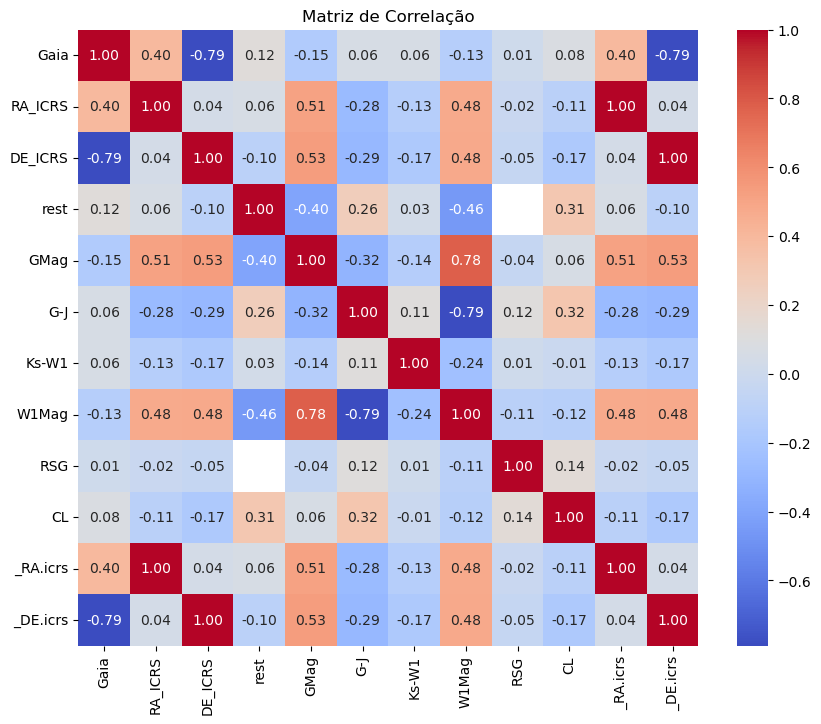

In [3]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de Correlação')
plt.show()

C:\Users\natasha.fonseca\AppData\Local\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:122: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


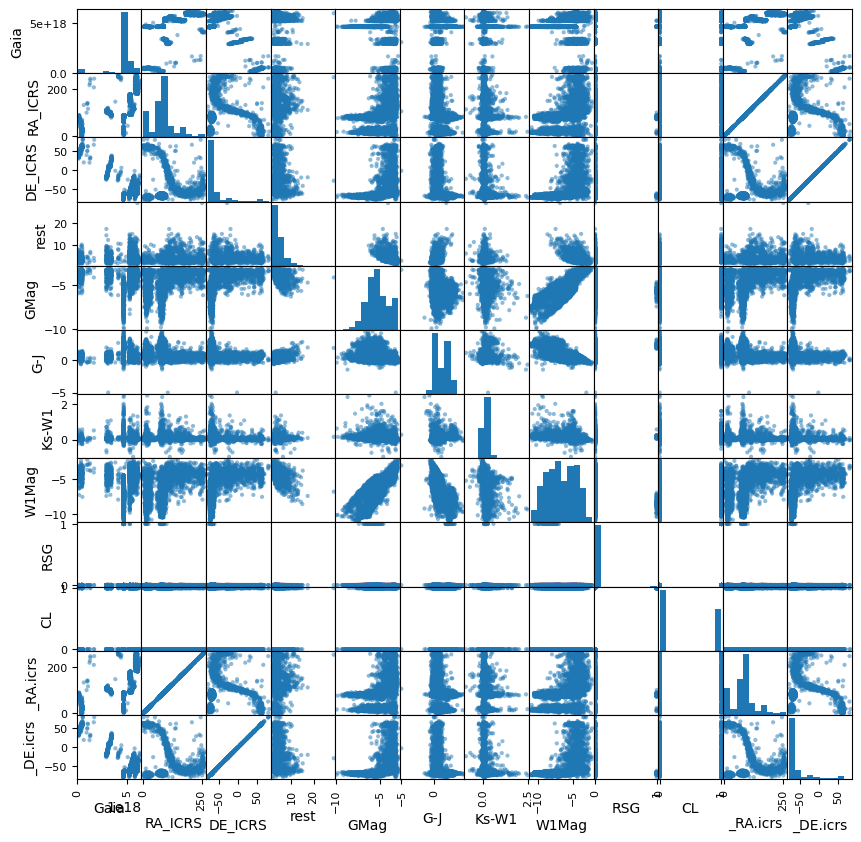

In [4]:
scatter_matrix(data, diagonal='hist', figsize=(10, 10)) 
plt.show()

### Como não tenho tanto conhecimento sobre estrelas, escolhi as colunas de índice de cor, magnitude e absorção. Essa escolha foi feita porque não adiantaria ter tantas informações sobre os objetos se eu não souber filtrá-las. O código pode funcionar, mas minha análise não seria muito eficiente.

In [5]:
catalog = Vizier(catalog="J/ApJ/913/32/sample", columns=['J-H', 'Gmag', 'G-J', 'H-Ks', 'cLabel','BP-RP','AG'])

catalog.ROW_LIMIT = 6000
result = catalog.query_constraints()
data = result[0].to_pandas()

correlation_matrix = data[['J-H', 'Gmag', 'G-J', 'H-Ks','BP-RP','AG']].corr()

print("Matriz de Correlação:")
print(correlation_matrix)

Matriz de Correlação:
            J-H      Gmag       G-J      H-Ks     BP-RP        AG
J-H    1.000000  0.600602  0.943416  0.751021  0.953742  0.223005
Gmag   0.600602  1.000000  0.539004  0.473031  0.523100  0.178639
G-J    0.943416  0.539004  1.000000  0.742984  0.989057  0.320231
H-Ks   0.751021  0.473031  0.742984  1.000000  0.747047  0.327063
BP-RP  0.953742  0.523100  0.989057  0.747047  1.000000  0.331869
AG     0.223005  0.178639  0.320231  0.327063  0.331869  1.000000


In [6]:
correlation_matrix = data.corr()

#Acha o par com a maior correlação, ignorando a diagonal principal (que sempre será 1)
max_correlation = correlation_matrix.unstack().sort_values().drop_duplicates()
max_correlation = max_correlation[max_correlation.index.get_level_values(0) != max_correlation.index.get_level_values(1)].tail(1)

print(max_correlation)

G-J  BP-RP    0.989057
dtype: float64


C:\Users\natasha.fonseca\AppData\Local\Temp\ipykernel_12228\1381553310.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


### De fato, Gmag e G-J não era uma correlação tão forte quanto G-J e BP-RP. Aqui, comparo as duas:

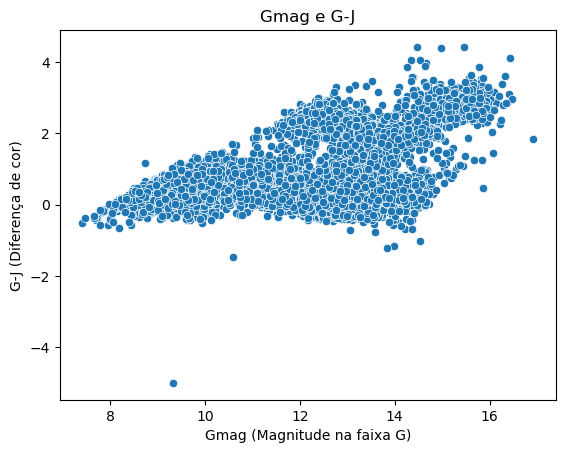

In [7]:
#Plot entre 'Gmag' e 'G-J'
sns.scatterplot(data=data, x='Gmag', y='G-J')
plt.title('Gmag e G-J')
plt.xlabel('Gmag (Magnitude na faixa G)')
plt.ylabel('G-J (Diferença de cor)')
plt.show()


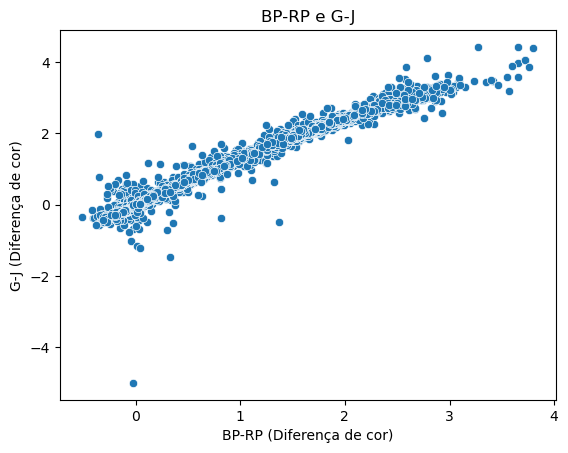

In [8]:
#Plot entre 'BP-RP' e 'G-J'
sns.scatterplot(data=data, x='BP-RP', y='G-J')
plt.title('BP-RP e G-J')
plt.xlabel('BP-RP (Diferença de cor)')
plt.ylabel('G-J (Diferença de cor)')
plt.show()

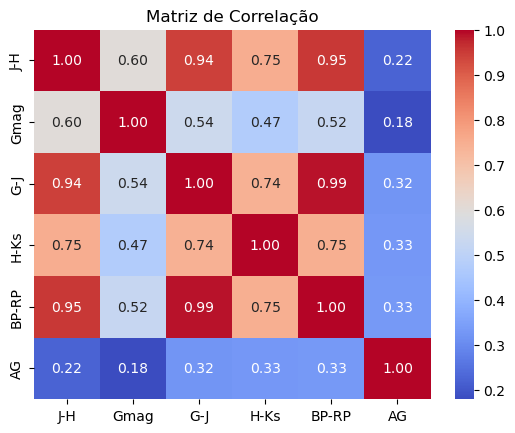

In [10]:
#Heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


In [11]:
table = result[0]
df = table.to_pandas()

In [12]:
df.head()

,J-H,Gmag,G-J,H-Ks,cLabel,BP-RP,AG
0,0.06,9.07,0.35,0.03,Cool,0.24,0.94
1,0.18,11.55,0.72,0.01,Hot,0.57,1.33
2,0.16,11.85,0.88,0.06,EM,0.61,1.23
3,0.01,9.81,0.47,0.00,Hot,0.37,0.48
4,-0.15,8.19,-0.66,-0.03,Hot,-0.15,0.12


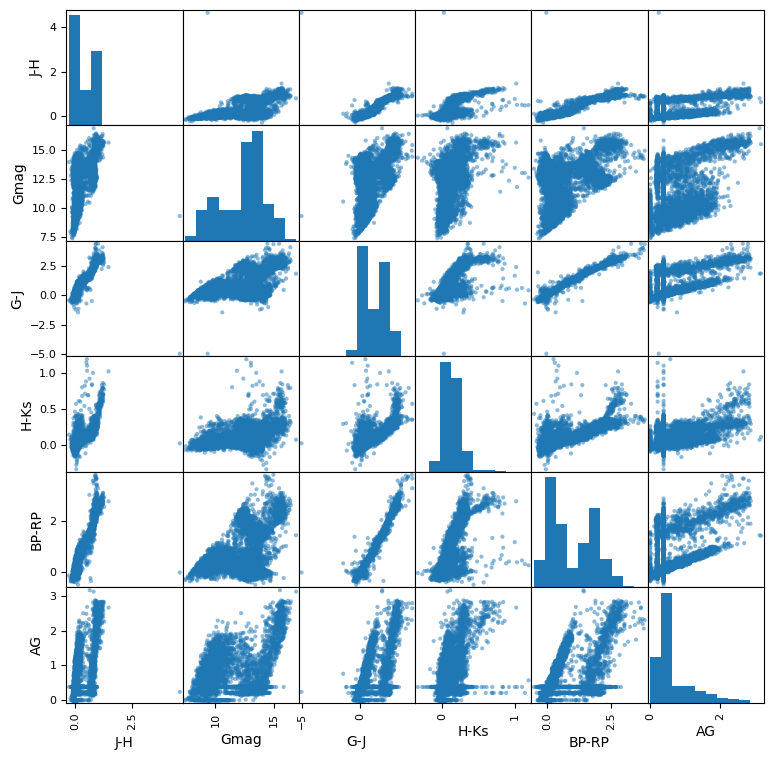

In [13]:
scatter_matrix(df, diagonal='hist', figsize=(9, 9))  # Criando um scatter plot matrix
plt.show()

# Classificação dos objetos

In [14]:
df3 = df
df3.info()
X = df3.drop('cLabel', axis=1)

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(df3['cLabel'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   J-H     5996 non-null   float32
 1   Gmag    6000 non-null   float32
 2   G-J     5996 non-null   float32
 3   H-Ks    5996 non-null   float32
 4   cLabel  6000 non-null   object 
 5   BP-RP   6000 non-null   float32
 6   AG      6000 non-null   float32
dtypes: float32(6), object(1)
memory usage: 187.6+ KB


                   precision    recall  f1-score   support

             Cool       0.54      0.86      0.67        36
              Hot       0.70      0.75      0.73       336
Unknown/Candidate       0.61      0.49      0.54       113
               EM       0.75      0.85      0.79       566

        micro avg       0.71      0.78      0.74      1051
        macro avg       0.65      0.74      0.68      1051
     weighted avg       0.71      0.78      0.74      1051



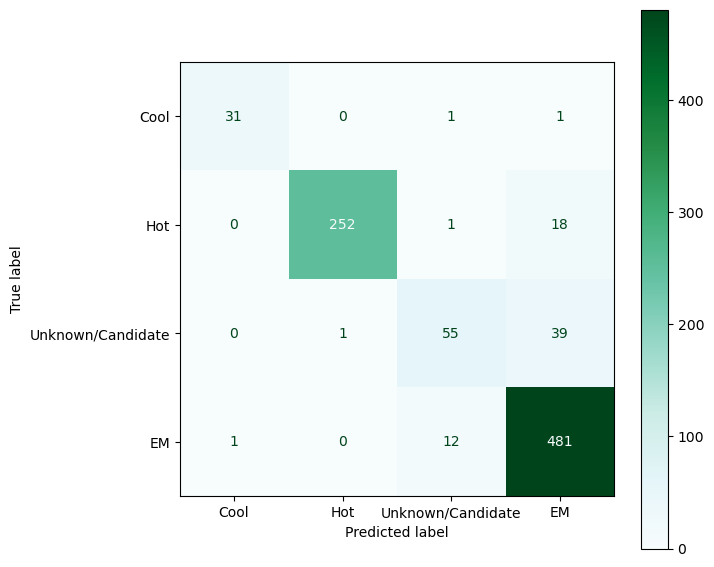

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
dtc = DecisionTreeClassifier(splitter = "best", criterion = "entropy", max_depth = 3) #max_depth = 3 para evitar overfitting, problema clássico em árvores de decisão

#Lembrando que, como vimos em aula:
#splitter = "best" indica melhor separação possível para os dados
#criterion = "entropy" indica que a árvore buscará ter sempre apenas uma classe dentro de cada separação, logo, entropia = 0

#Iniciando o trinamento e realizando as predições
dtc = dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)


#Código do Classification Report, para vermos os resultados de capacidade de predição de cada modelo
print(classification_report(y_test, pred, labels=[0,1,2,3], target_names=['Cool','Hot','Unknown/Candidate','EM']))

#Criando e plotando a matriz de confusão!
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, pred, labels = [0,1,2,3], display_labels = ['Cool','Hot','Unknown/Candidate','EM'], cmap='BuGn', ax=ax)
ax.tick_params(axis='both', which='major')

### Não houve muita diferença de classificação ao incluir novos parâmetros

# Previsão de valores utilizando regressão

In [16]:
#Removendo valores NA (ausentes)
df_cleaned = df[['BP-RP', 'G-J']].dropna()

#Escolhendo os parâmetros de maior correlação e separando entre teste e treino
X = df_cleaned[['BP-RP']]
y = df_cleaned['G-J']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de treinamento
k_neighbors = 90
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_regressor.fit(X_train, y_train)

#Previsão
pred = knn_regressor.predict(X_test)

#Avaliando performance do modelo
r2 = r2_score(y_test, pred)
print(f'R-squared: {r2}')


R-squared: 0.9676697390308326


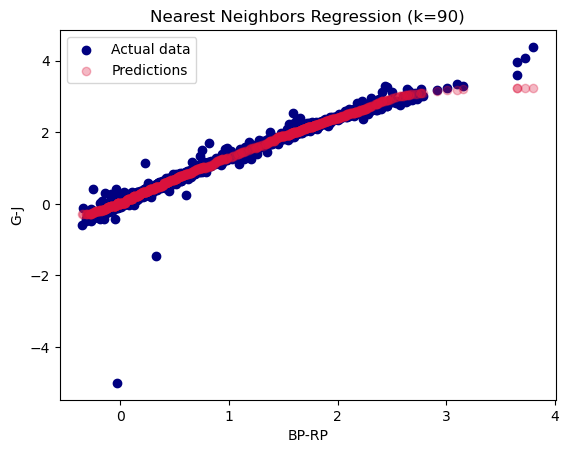

In [17]:
#Plot dos dados reais
plt.scatter(X_test, y_test, color='navy', label='Actual data')

#Plot das previsões
plt.scatter(X_test, pred, color='crimson', label='Predictions', alpha=0.3)

plt.title(f'Nearest Neighbors Regression (k={k_neighbors})')
plt.xlabel('BP-RP')
plt.ylabel('G-J')
plt.legend()
plt.show()


### Desta vez resolvi incluir a regressão das colunas que possuem maior correlação para testar o comportamento. Abaixo, vemos a regressão da minha escolha anterior, Gmag e G-J. Apesar de não ser uma previsão ruim (de fato segue o comportamento dos dados), a performance do modelo cai muito - de ~97% para 31%. De fato, eu deveria ter feito uma análise com mais parâmetros para decidir a melhor relação.

In [18]:
#Removendo valores NA (ausentes)
df_cleaned = df[['Gmag', 'G-J']].dropna()

#Escolhendo os parâmetros de maior correlação e separando entre teste e treino
X = df_cleaned[['Gmag']]
y = df_cleaned['G-J']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de treinamento
k_neighbors = 90
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_regressor.fit(X_train, y_train)

#Previsão
pred = knn_regressor.predict(X_test)

#Avaliando performance do modelo
r2 = r2_score(y_test, pred)
print(f'R-squared: {r2}')

R-squared: 0.3127971947356125


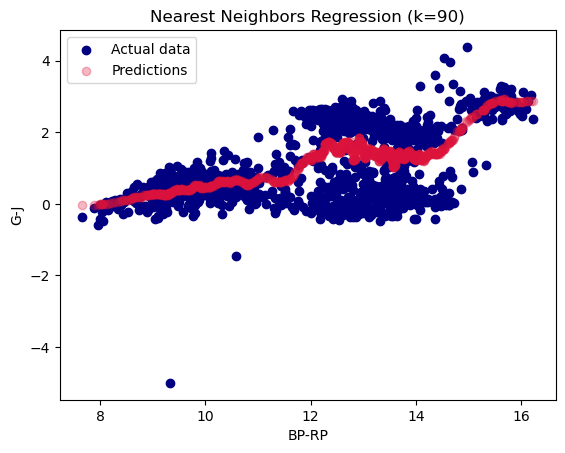

In [19]:
#Plot dos dados reais
plt.scatter(X_test, y_test, color='navy', label='Actual data')

#Plot das previsões
plt.scatter(X_test, pred, color='crimson', label='Predictions', alpha=0.3)

plt.title(f'Nearest Neighbors Regression (k={k_neighbors})')
plt.xlabel('BP-RP')
plt.ylabel('G-J')
plt.legend()
plt.show()